## Ödev1) Boş Copy Nedir? ".Copy" Nedir, yazdıktan sonra neleri değiştirir, neleri değiştirmez ?
##DeepCopy Nedir? Shallow Copy Nedir? Bunlar oluşturduğumuz df'de neleri değiştirir?


Cevap1) Boş copy .copy() ile çağrılır ve üzerine işlenen listenin yeni bir kopyası üretilmez, hedef ile nesne arasında bir bağ oluşur. Yazıldıktan sonra değişebilir veya değişemez demek için kopyalama tekniğine bakmak gerekir. Fakat .copy() bir shallow copy yöntemi olduğu için asıl listeye bağlıdır.

Shallow copy yapıldıktan sonra oluşan kopya, kopya yapılan listeye bağlıdır. Fakat DeepCopy yapıldıktan sonra oluşan kopya yeni bir nesnedir.

##Ödev2)e-01 yerine 0.78'i nasıl görebiliriz? 

In [3]:
A=1.72e-05
print(A)
B=format(float('1.72e-05'), 'f')
print(B)

1.72e-05
0.000017


##Ödev3)"np.Log()" doğal logoritma dediğimiz şekilde mi gelir yoksa log 2 tabanında mı gelir?

In [6]:
import numpy
numpy.log([1, numpy.e, numpy.e**2,10])

array([0.        , 1.        , 2.        , 2.30258509])

6. kod satırında da görüldüğü üzere np.Log() 10 tabanında da değildir, 2 tabanında da değildir. e tabanında işlem yapar, yani ln gibidir.

##Ödev4)Yeo-Johnson çok büyük değerlerde uygulanamıyor mu? Neden Income değerlerindeki "10" olan değerimizi arttırdığımızda(1000 yaptığımızda) çıktımızda bozulmalar oluyor?

In [16]:
import pandas as pd
df = pd.DataFrame({
    "Income": [15,18,120,10],
    "Age": [25,-1818,42,51],
    "Income_2":[15000,18000,120000,10000]
})

df_scaled= df.copy()
col_names=["Income","Age","Income_2"]
features=df_scaled[col_names]
features
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method="yeo-johnson")
df_scaled[col_names]=scaler.fit_transform(features.values)
df_scaled

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,Income,Age,Income_2
0,-0.317514,-0.165105,0.0
1,0.006579,-1.546334,0.0
2,1.543055,0.613769,0.0
3,-1.232121,1.097670,0.0


16. kod satırında görüldüğü üzere Income ve Age sütunları ölçeklenirken Income_2 sütunu ölçeklenmedi ve tüm değerlere direkt 0 verildi.
yeo johnson dönüşümü şu şekildedir.


y =

    ((x + 1)**lmbda - 1) / lmbda,                for x >= 0, lmbda != 0
    log(x + 1),                                  for x >= 0, lmbda = 0
    -((-x + 1)**(2 - lmbda) - 1) / (2 - lmbda),  for x < 0, lmbda != 2
    -log(-x + 1),                                for x < 0, lmbda = 2

yukarıda verilen y'ye bağlı fonksiyonda x ve lmbda değerleri yeojohnson içinde ayarlanabilir parametrelerdir ve x bir tek boyutlu arraydir ve lmbda ise float tarzıdır.

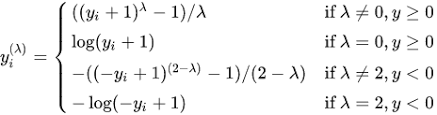

lmbda değeri default None olarak gelir. 

In [39]:
from scipy import stats
import matplotlib.pyplot as plt

Income_2=(10,1,10,40)
R = stats.yeojohnson(x=Income_2,lmbda=0.001)
R

array([2.40077252, 0.69338746, 2.40077252, 3.72047592])

Fonksiyonu çözemedim.